# Workshop 3: Trabalho prático de Classificação

<a id="section_intro"></a>
##  Introdução

Este trabalho consite na aplicação de três modelos de classificação onde utilizamos os dados de pacientes com câncer de mama obtido a partir da atualização de novembro de 2017 do Programa SEER do NCI, que fornece informações sobre estatísticas de câncer de base populacional. O conjunto de dados envolveu pacientes do sexo feminino com câncer de mama de ducto infiltrante e carcinoma lobular (SEER primary cita recode NOS histology codes 8522/3) diagnosticados em 2006-2010. Pacientes com tamanho de tumor desconhecido, LNs regionais examinados, LNs regionais positivos e pacientes cujos meses de sobrevida foram inferiores a 1 mês foram excluídos; assim, 4.024 pacientes foram finalmente incluídos. Onde vamos classificar se o paciente sobrevive ou morre a doença.

## Importando pacotes que serão utilizados:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='white')
sns.color_palette('hls', 8)

%matplotlib inline

## Importando os dados que serão utilizados

In [2]:
df = pd.read_csv('../Workshop-3-DS-Digital-House/Breast_Cancer.csv')

## Checando dados

In [3]:
df.head()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


## Colunas do data set


1. Age - Idade no momento do diagnóstico
2. Race - Raça do paciente
3. Marital Status - Estado Civil
4. T Stage - Indica o tamanho do tumor primário(no ductor mamario) e se dessiminou para a vizinhaça.
    - T1 - sem evidência de tumor primario
    - T2 - Tumor de 1 a 2 centimetros
    - T3 - Tumor de 2 a 5 centimetros
    - T4 - Tumor com mais do que 5 centimetros
5. N Stage - Existência de disseminação da doença para os linfonados regionais.
6. 6th Stage Grade - combinação de variáveis para denotar o estágio (mesmo campo que GRADE)
7. A Stage - Localidade do cancer (regional ou espalhado pelo corpo)
8. Tumor Size - Tamanho do cancer em milimetros
9. Estrogen Status - Status do estrogênio na paciente (null para casos em que não há cancer de mama)
10. Progesterone Status - Status da progesterona na paciente (null para casos em que não há cancer de mama)
11. Regional Node Examined - Quantidade de nódulos regionais removidos e inspecionados pelo patologista
12. Reginal Node Positive - quantidade de nódulos examinados que contém metastases
13. Survival Months - tempo de sobrevivência
14. Status - Status da paciente (vivo ou morto)

## Removendo, ajustando e manipulando informações

###  removendo coluna "unamed" e renomeando colunas para utilizar

In [4]:
df = df.drop(['Unnamed: 3'], axis=1)
df.rename(columns = {'Race ': 'Race',
                     'Marital Status': 'Marital_Status',
                     'T Stage ': 'T_Stage',
                     'N Stage': 'N_Stage',
                     '6th Stage': '6th_Stage',
                     'A Stage': 'A_Stage',
                     'Tumor Size': 'Tumor_Size',
                     'Estrogen Status': 'Estrogen_Status',
                     'Progesterone Status': 'Progesterone_Status',
                     'Regional Node Examined': 'Regional_Node_Examined',
                     'Reginol Node Positive': 'Regional_Node_Positive',
                     'Survival Months': 'Survival_Months'}, 
            inplace=True)

In [5]:
df.columns

Index(['Age', 'Race', 'Marital_Status', 'T_Stage', 'N_Stage', '6th_Stage',
       'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
       'Progesterone_Status', 'Regional_Node_Examined',
       'Regional_Node_Positive', 'Survival_Months', 'Status'],
      dtype='object')

### checando nulos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital_Status          4024 non-null   object
 3   T_Stage                 4024 non-null   object
 4   N_Stage                 4024 non-null   object
 5   6th_Stage               4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A_Stage                 4024 non-null   object
 8   Tumor_Size              4024 non-null   int64 
 9   Estrogen_Status         4024 non-null   object
 10  Progesterone_Status     4024 non-null   object
 11  Regional_Node_Examined  4024 non-null   int64 
 12  Regional_Node_Positive  4024 non-null   int64 
 13  Survival_Months         4024 non-null   int64 
 14  Status                  4024 non-null   object
dtypes: i

### Manipulando variáveis para ajudar na visualização

In [7]:
# convertendo a categoria 'race'
df['Race'] = df['Race'].replace(
    'Other (American Indian/AK Native, Asian/Pacific Islander)', 'Other'
)

# ajustando categoria Marital_Status
df['Marital_Status'] = df['Marital_Status'].replace(
    ['Married (including common law)', 'Single (never married)'] , ['Married', 'Single']
)

df['Grade'] = df['Grade'].replace(
    ['Moderately differentiated; Grade II', 'Poorly differentiated; Grade III', 'Well differentiated; Grade I', 'Undifferentiated; anaplastic; Grade IV'],
     ['Moderately_differentiated', 'Poorly_differentiated', 'Well_differentiated', 'Undifferentiated']
)

In [8]:
df['Grade'].value_counts()

Moderately_differentiated    2351
Poorly_differentiated        1111
Well_differentiated           543
Undifferentiated               19
Name: Grade, dtype: int64

## Checando variáveis

### Distribuição de idade

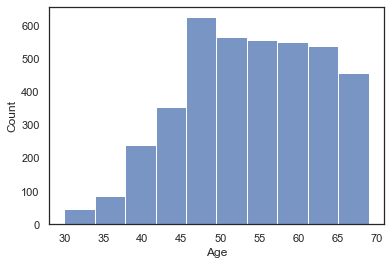

In [9]:
sns.histplot(df, x='Age', bins= 10)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x11c66f7c250>,
 'caps': [<matplotlib.lines.Line2D at 0x11c66f7c8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11c66f6af40>],
 'medians': [<matplotlib.lines.Line2D at 0x11c66f7cd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x11c66f8d0a0>],
 'means': []}

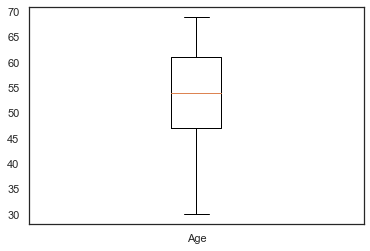

In [10]:
plt.boxplot(df.Age, labels=['Age'])

### Distribuição de etnias

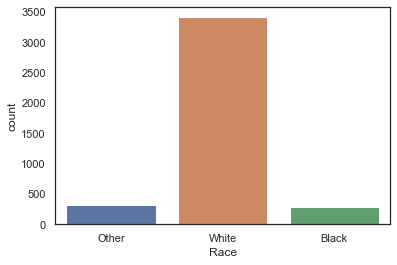

In [11]:
sns.countplot(x='Race', data = df)
plt.show()

### Estado Civil

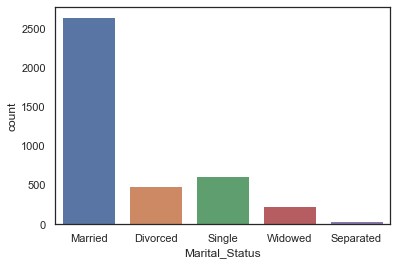

In [12]:
sns.countplot(x='Marital_Status', data = df)
plt.show()

### Estágio do cancer

Lembrando que:
* T Stage - estagio do cancer
    - T1 - sem evidência de tumor primario
    - T2 - Tumor de 1 a 2 centimetros
    - T3 - Tumor de 2 a 5 centimetros
    - T4 - Tumor com mais do que 5 centimetros

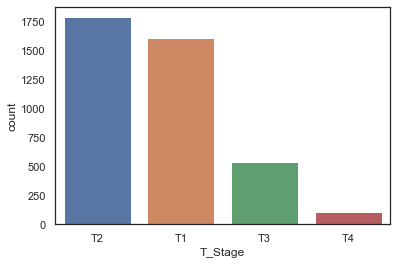

In [13]:
sns.countplot(x='T_Stage', data = df)
plt.show()

### estágio do cancer (análogo à GRADE)

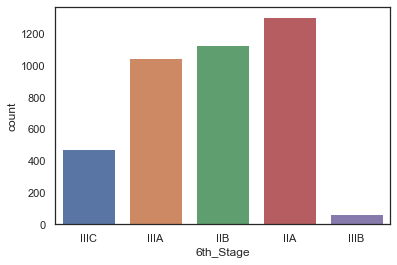

In [14]:
sns.countplot(x='6th_Stage', data = df)
plt.show()

### Diferenciação do tipo de cancer

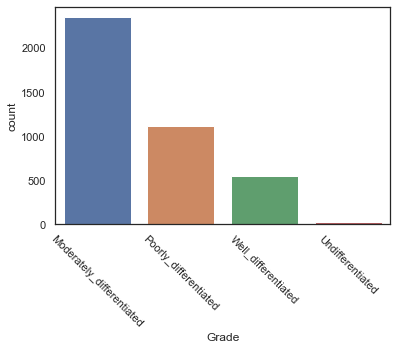

In [15]:
sns.countplot(x='Grade', data = df)
plt.xticks(rotation = -45)
plt.show()

### Classificação da posição do câncer

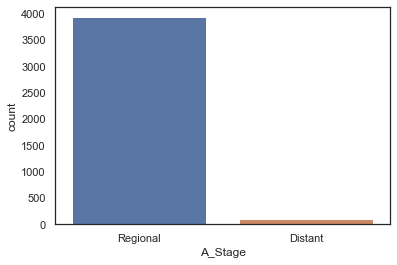

In [16]:
sns.countplot(x='A_Stage', data = df)
plt.show()

### Distribuição de tamanho dos tumores

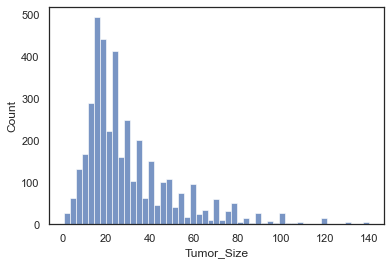

In [17]:
sns.histplot(x='Tumor_Size', data = df)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x11c671e2790>,
 'caps': [<matplotlib.lines.Line2D at 0x11c6727e070>,
 'boxes': [<matplotlib.lines.Line2D at 0x11c671e2910>],
 'medians': [<matplotlib.lines.Line2D at 0x11c6727efd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11c6727e940>],
 'means': []}

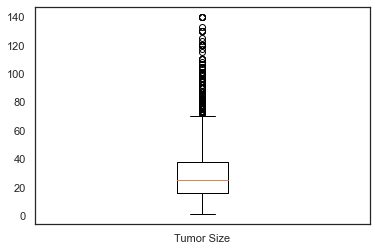

In [18]:
plt.boxplot(df.Tumor_Size, labels=['Tumor Size'])

### Status do estrogênio na paciente

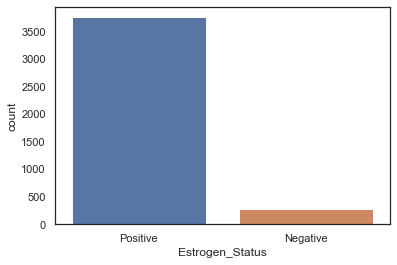

In [19]:
sns.countplot(x = 'Estrogen_Status', data = df)
plt.show()

### Status da progesterona na paciente

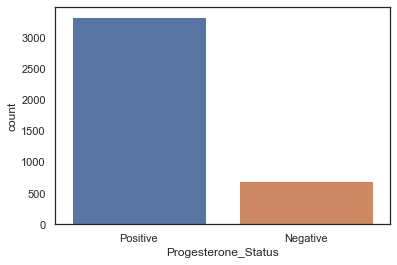

In [20]:
sns.countplot(x = 'Progesterone_Status', data = df)
plt.show()

### Quantidade de nódulos regionais examinados

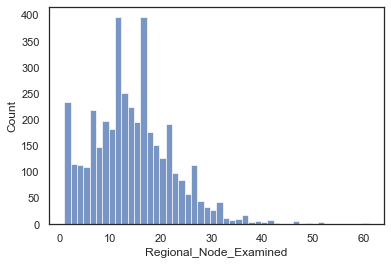

In [21]:
sns.histplot(x = 'Regional_Node_Examined', data = df)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x11c67011070>,
 'caps': [<matplotlib.lines.Line2D at 0x11c670114f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11c66fe3d60>],
 'medians': [<matplotlib.lines.Line2D at 0x11c67011a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x11c67011d60>],
 'means': []}

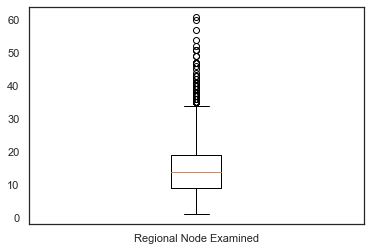

In [22]:
plt.boxplot(df.Regional_Node_Examined, labels=['Regional Node Examined'])

### Quantidade de nódulos regionais examinados - positivos para metastase (câncer)

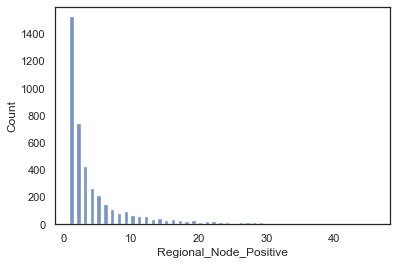

In [23]:
sns.histplot(x = 'Regional_Node_Positive', data = df)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x11c67252880>,
 'caps': [<matplotlib.lines.Line2D at 0x11c67252d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x11c672525b0>],
 'medians': [<matplotlib.lines.Line2D at 0x11c6725b2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11c6725b5b0>],
 'means': []}

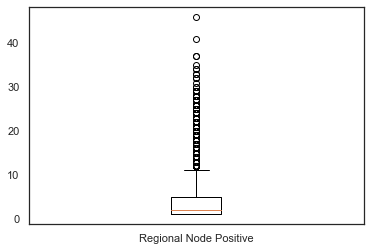

In [24]:
plt.boxplot(df.Regional_Node_Positive, labels=['Regional Node Positive'])

### Distribuição de "meses de sobrevivência da paciente"

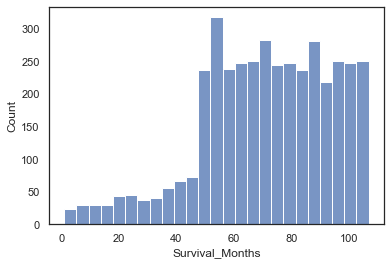

In [26]:
sns.histplot(x = 'Survival_Months', data = df)
plt.show()

### proporção de pacientes vivos/mortos

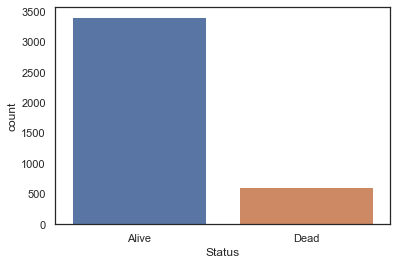

In [27]:
sns.countplot(x = 'Status', data = df)
plt.show()

In [28]:
df.Status.value_counts()

Alive    3408
Dead      616
Name: Status, dtype: int64

### Correlação entre as variáveis

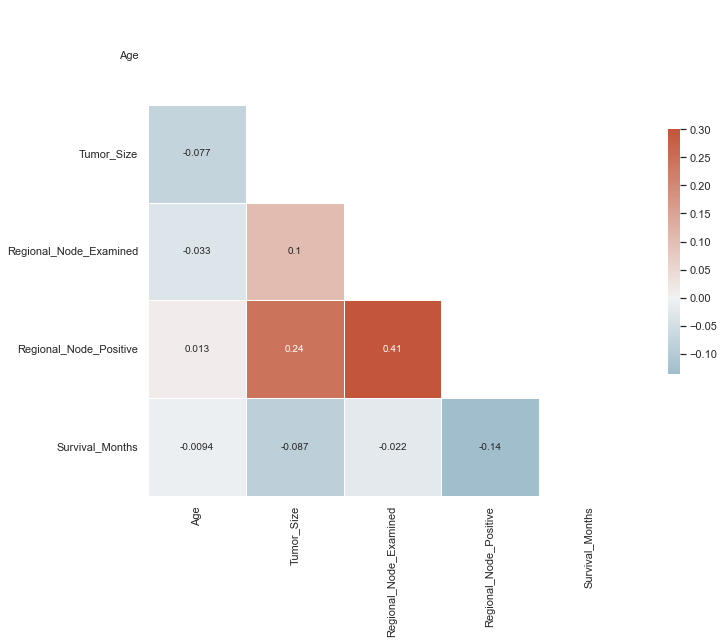

In [29]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

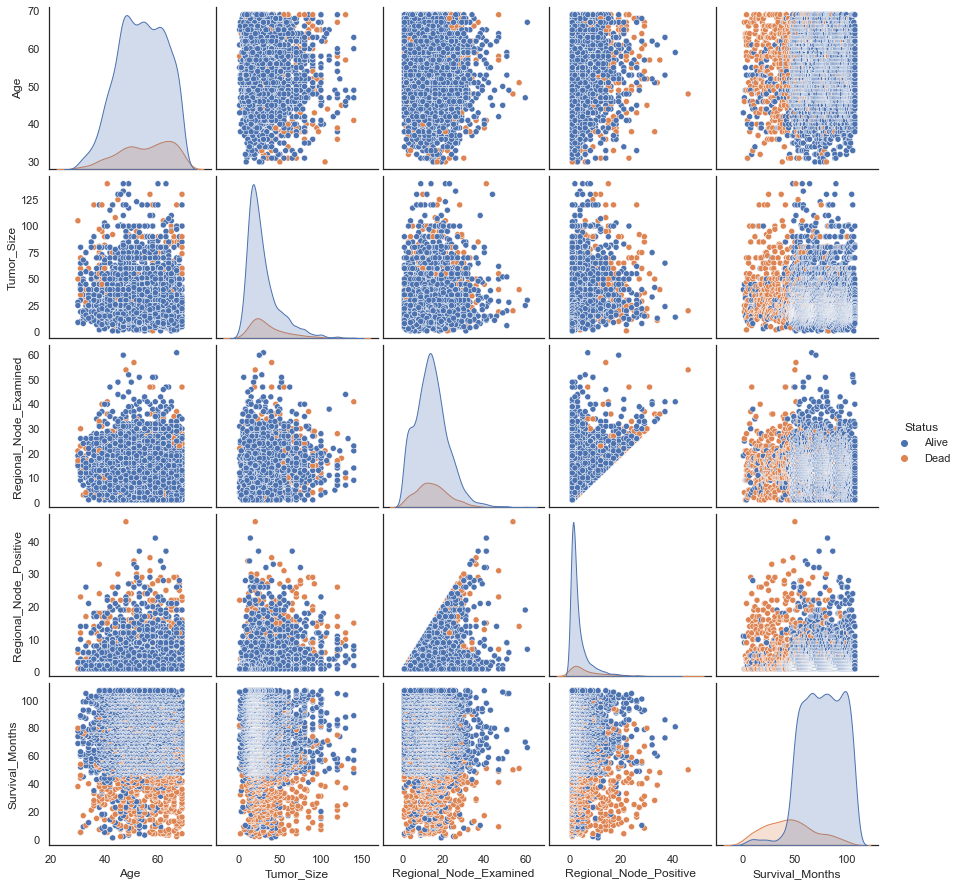

In [30]:
sns.pairplot(df, hue = 'Status')
plt.show()

## Modelagem

In [31]:
from sklearn.preprocessing import LabelEncoder

pd.get_dummies(df, columns = )

SyntaxError: invalid syntax (1726487959.py, line 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



markdown teste commit lucas